In [1]:
# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the Datset
df = pd.read_csv("Gender.csv")

In [3]:
df

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M
...,...,...,...,...
104,166,140.0,41,F
105,190,105.0,42,F
106,186,118.0,43,M
107,168,123.0,42,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [5]:
df.describe()

,Hight,Weight,Shoe size
count,109.000000,109.000000,109.000000
mean,173.403670,95.887156,40.743119
std,13.581114,30.423234,1.771187
min,140.000000,49.000000,36.000000
25%,164.000000,68.000000,39.000000
50%,174.000000,95.000000,41.000000
75%,185.000000,118.000000,42.000000
max,197.000000,159.000000,44.000000


In [6]:
# Encoding the species column to 0 and 1
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df

,Hight,Weight,Shoe size,Gender,Gender_encoded
0,180,79.0,42,M,1
1,165,65.0,41,M,1
2,178,72.0,42,M,1
3,160,53.0,43,M,1
4,182,78.0,36,M,1
...,...,...,...,...,...
104,166,140.0,41,F,0
105,190,105.0,42,F,0
106,186,118.0,43,M,1
107,168,123.0,42,M,1


In [7]:
# Grouping the Species by encoded value
s=df.groupby("Gender_encoded")

In [8]:
F = s.get_group(0)
M = s.get_group(1)

In [9]:
F.head()

,Hight,Weight,Shoe size,Gender,Gender_encoded
5,158,55.0,38,F,0
6,165,59.0,38,F,0
12,178,62.0,42,F,0
13,165,120.0,40,F,0
14,160,50.0,38,F,0


In [10]:
M.head()

,Hight,Weight,Shoe size,Gender,Gender_encoded
0,180,79.0,42,M,1
1,165,65.0,41,M,1
2,178,72.0,42,M,1
3,160,53.0,43,M,1
4,182,78.0,36,M,1


In [11]:
# Splitting the dataset into independent and dependent value
x = df.drop(['Gender_encoded', 'Gender'], axis=1)
y=df.Gender_encoded

In [12]:
x

,Hight,Weight,Shoe size
0,180,79.0,42
1,165,65.0,41
2,178,72.0,42
3,160,53.0,43
4,182,78.0,36
...,...,...,...
104,166,140.0,41
105,190,105.0,42
106,186,118.0,43
107,168,123.0,42


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
104    0
105    0
106    1
107    1
108    0
Name: Gender_encoded, Length: 109, dtype: int32

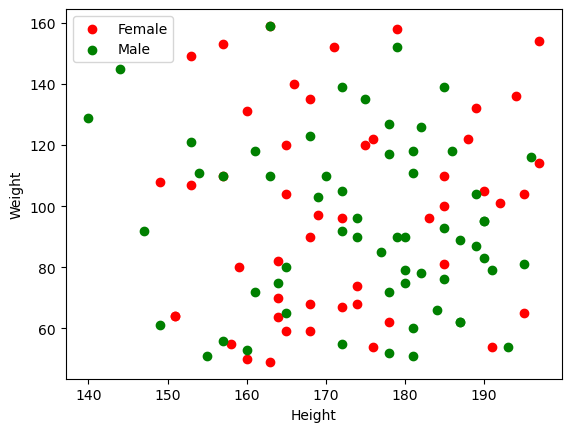

In [14]:
plt.xlabel("Height")
plt.ylabel("Weight")

plt.scatter(F["Hight"],F["Weight"],color="red",label="Female")
plt.scatter(M["Hight"],M["Weight"],color="green",label="Male")

plt.legend()

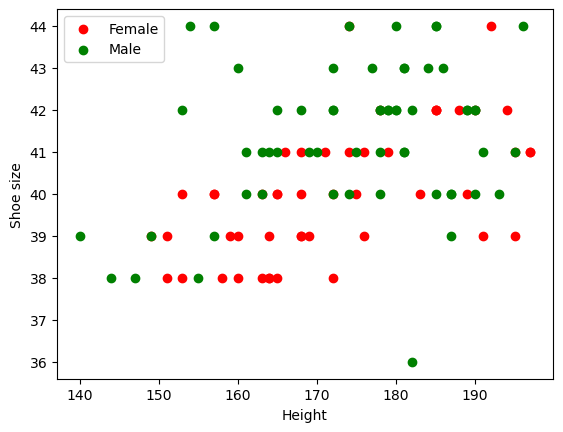

In [15]:
plt.xlabel("Height")
plt.ylabel("Shoe size")

plt.scatter(F["Hight"],F["Shoe size"],color="red",label="Female")
plt.scatter(M["Hight"],M["Shoe size"],color="green",label="Male")

plt.legend()

In [16]:
# Splitting the datset into Training and Testing with 8:2 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Importing the KNN Model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
model.score(x_test,y_test)

0.7272727272727273

In [19]:
# Model Testing
model.predict(x_test)== y_test

75      True
103     True
92      True
88      True
80      True
18      True
108     True
67     False
1      False
10      True
102    False
8       True
40      True
43     False
53      True
27      True
49      True
61     False
98      True
9       True
39      True
31     False
Name: Gender_encoded, dtype: bool